In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [8]:
!pip install --upgrade scikit-learn mlxtend

In [9]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [11]:
model = sel.fit(df.iloc[:,:4],df['species'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

In [12]:
model.best_score_

0.9733333333333334

In [13]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [14]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [15]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


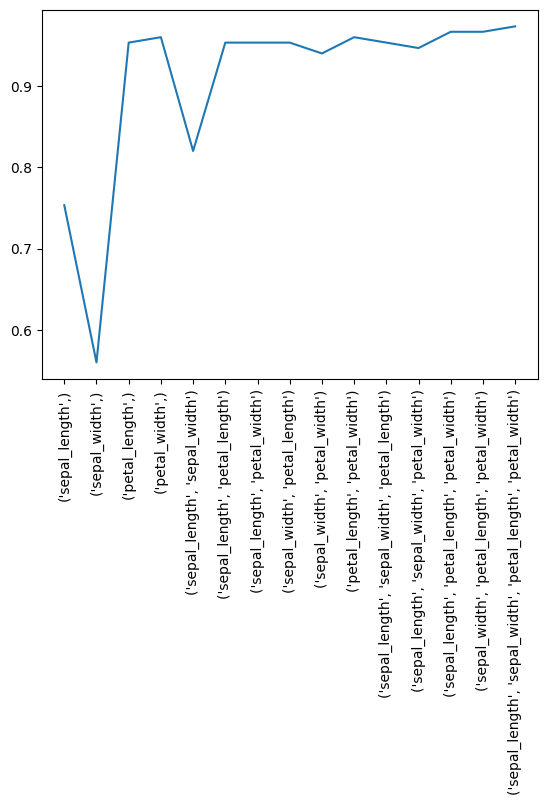

In [16]:
import matplotlib.pyplot as plt
plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.5126724515586618
testing 0.38182026247915213


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [21]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [22]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [23]:
sel.best_score_

0.682798815680008

In [24]:
sel.best_feature_names_

('crim', 'zn', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat')

In [25]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919121, 0.12695789031653215, -0....",0.129009,"(crim,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182765, -0.10598329567838705, 0....",0.100963,"(zn,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549378, 0.0029283993633670846, -0...",0.210465,"(indus,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(chas,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675012, 0.03113193162308736, 0.0...",0.17746,"(nox,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861538, 0.576226384714265, 0.4354...",0.679213,"(crim, zn, indus, nox, rm, age, dis, rad, tax,...",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752518, 0.5384374917854713, 0.458...",0.679018,"(crim, zn, chas, nox, rm, age, dis, rad, tax, ...",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072387, 0.5454006150975963, 0.444...",0.66547,"(crim, indus, chas, nox, rm, age, dis, rad, ta...",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451409, 0.5448662375728665, 0.449...",0.670075,"(zn, indus, chas, nox, rm, age, dis, rad, tax,...",0.094633,0.127415,0.042472


In [26]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [27]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [28]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291953, 0.5742220049707858, 0.437...",0.682799,"(crim, zn, nox, rm, dis, rad, tax, ptratio, b,...",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927688, 0.5819307800982552, 0.462...",0.680483,"(crim, zn, nox, rm, dis, rad, tax, ptratio, ls...",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985803, 0.5752245789381291, 0.438...",0.681125,"(crim, zn, indus, nox, rm, dis, rad, tax, ptra...",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119781, 0.5381382515761789, 0.461...",0.680994,"(crim, zn, chas, nox, rm, dis, rad, tax, ptrat...",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726806, 0.5751761822045953, 0.434...",0.680914,"(crim, zn, nox, rm, age, dis, rad, tax, ptrati...",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699067, -0.026141441832759904, 0...",0.073485,"(chas, b)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(b,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.037121972271341175, -0.16717603954280036, ...",0.057453,"(chas, dis)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(dis,)",0.066813,0.089958,0.029986,404,1,0.036424


In [29]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [30]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218548
testing 0.7205819296124464


### Sequential Backward Elimination

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)



(404, 13)


In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [34]:
lr = LinearRegression()
# perform Forward elimination
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)
sfs_b = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)
sfs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [ ]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252
3,"(5, 10, 12)","[0.7215896884753016, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568
4,"(5, 10, 11, 12)","[0.7258772165486241, 0.6342604286872173, 0.655...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158778, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527
7,"(1, 4, 5, 7, 10, 11, 12)","[0.754884343390746, 0.6798073590310515, 0.6621...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205137, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905562, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924


In [ ]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753016, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.7258772165486241, 0.6342604286872173, 0.655...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158778, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.754884343390746, 0.6798073590310515, 0.6621...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205137, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905562, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


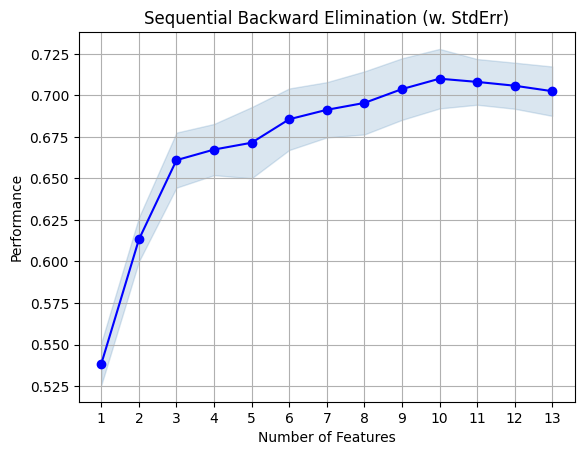

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


In [ ]:
X_train_sel.shape

(404, 10)

### using sklearn

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)
sfs2 = sfs2.fit(X_train, y_train)

ImportError: ignored

In [ ]:
np.arange(X.shape[1])[sfs2.support_]

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Forward feature selection
sfs_forward = SequentialFeatureSelector(clf,
                                        k_features=10,
                                        forward=True,
                                        scoring='accuracy',
                                        cv=5)

# Fit the forward feature selection
sfs_forward.fit(X_train, y_train)

# Get selected features
selected_features_forward = X_train[:, sfs_forward.k_feature_idx_]

# Train final model using selected features
clf.fit(selected_features_forward, y_train)

# Predict using test data
y_pred_forward = clf.predict(X_test)

# Evaluate accuracy
accuracy_forward = accuracy_score(y_test, y_pred_forward)
print("Accuracy using Forward Feature Selection:", accuracy_forward)

# Backward feature selection
sfs_backward = SequentialFeatureSelector(clf,
                                         k_features=10,
                                         forward=False,
                                         scoring='accuracy',
                                         cv=5)

# Fit the backward feature selection
sfs_backward.fit(X_train, y_train)

# Get selected features
selected_features_backward = X_train[:, sfs_backward.k_feature_idx_]

# Train final model using selected features
clf.fit(selected_features_backward, y_train)

# Predict using test data
y_pred_backward = clf.predict(X_test)

# Evaluate accuracy
accuracy_backward = accuracy_score(y_test, y_pred_backward)
print("Accuracy using Backward Feature Selection:", accuracy_backward)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

ValueError: X has 20 features, but RandomForestClassifier is expecting 10 features as input.